

Nous allons commencer par une tâche de classification très simple à l'aide d'un simple ensemble de données numériques.


Nous devons d'abord importer les bibliothèques avec lesquelles nous allons travailler. 


In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

Ensuite, nous créons deux listes vides. 
L'un contiendra les données d'entrée, l'autre contiendra les données cibles. 

In [2]:
train_labels = []
train_samples = []

Création de données

Pour cette tâche simple, nous allons créer notre propre ensemble de données d'exemple.

Supposons qu'un médicament expérimental a été testé sur des individus allant de l'âge de 13 à 100 ans dans un essai clinique.
Il y 2100 participants.
La moitié des participants étaient sous 65ans, et l'autre moitié était 65ans ou plus.

L'étude a montré qu'environ 95% des malades 65 ans ou plus âgés ont éprouvé des effets secondaires du médicament,
et autour 95% des patients sous 65 ans n'a connu aucun côté effets indésirables, montrant généralement que les personnes âgées étaient plus susceptibles de ressentir des effets secondaires.

En fin de compte, nous voulons construire un modèle pour nous dire si un patient ressentira ou non des effets secondaires uniquement en fonction de son âge.
Le resultat du modèle sera basé sur les données de formation.

Notez qu'avec la simplicité des données ainsi que les conclusions qui en sont tirées, un réseau de neurones peut être exagéré, c'est juste pour commencer à travailler avec des données pour l'apprentissage en profondeur.

Le bloc de code ci-dessous montre comment générer ces données factices. 

In [3]:
for i in range(50):
    # 5 % des personnes plus jeunes ont ressenti des effets secondaires
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # 5 % des personnes âgées qui n'ont pas ressenti d'effets secondaires
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)


In [5]:
for i in range(1000):
    # 95 % des personnes plus jeunes n'ont pas ressenti d'effets secondaires
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # 95 % des personnes âgées qui ont ressenti des effets secondaires
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


 Ce code crée 2100 échantillonne et stock l'âge des individus dans le repertoire train_samples et stock si les individus ont ressenti ou non des effets secondaires dans le repertoire train_labels.


In [6]:
for i in train_samples:
    print(i)


16
70
59
66
15
83
33
95
39
95
61
92
36
78
42
91
50
99
42
75
30
73
55
99
34
67
56
95
21
95
18
97
35
79
24
67
31
76
23
76
36
79
14
80
47
78
26
67
17
71
24
88
16
80
32
78
22
69
27
95
56
81
59
67
22
79
19
95
22
97
16
73
44
69
49
97
31
82
38
75
56
77
26
97
18
81
28
86
14
99
38
94
49
70
14
67
64
75
26
90
61
87
54
65
43
76
44
71
37
83
25
76
36
74
34
97
17
78
51
70
16
100
24
68
15
87
22
90
36
73
51
71
13
78
15
68
49
93
27
80
33
82
48
83
41
65
24
69
33
90
20
92
18
71
35
95
29
66
46
68
45
80
62
79
53
65
64
65
14
81
16
76
45
69
47
83
43
99
31
73
18
82
40
91
30
91
32
73
59
88
57
78
16
100
46
77
21
68
20
75
42
73
23
97
53
71
26
93
48
83
28
79
33
69
61
93
54
90
37
92
41
85
53
68
22
94
14
88
46
76
17
99
20
91
34
100
52
90
37
94
30
83
40
68
52
85
21
89
34
83
55
77
19
89
37
82
16
69
53
94
22
88
64
84
48
100
42
94
39
100
17
84
29
71
19
74
37
85
41
98
41
85
47
97
20
74
16
78
61
73
61
84
33
85
59
67
36
100
34
94
39
79
41
71
21
68
28
100
22
76
42
85
49
86
37
84
41
78
48
92
64
99
23
93
58
77
37
81
55
92
15


29
88
15
100
20
83
41
72
46
86
29
80
16
80
43
98
17
97
27
77
31
71
43
92
14
85
17
83
49
81
41
67
60
82
23
65
63
94
20
80
48
79
30
68
21
70
27
65
62
69
22
71
26
84
28
92
58
96
16
73
33
67
39
71
47
69
47
67
49
91
30
85
21
73
24
75
22
78
55
89
35
91
43
99
23
96
28
82
58
93
34
80
16
81
27
78
43
90
64
72
16
68
29
100
31
91
19
77
34
94
47
78
13
93
43
76
24
77
44
78
61
91
39
68
51
74
53
83
37
66
14
84
43
86
55
91
54
87
41
68
43
77
63
97
55
68
61
75
24
92
40
92
53
75
63
69
31
67
13
83
23
72
53
95
34
79
19
75
57
72
18
67
50
97
38
95
32
96
50
90
58
91
17
99
28
73
13
95
46
81
26
80
46
100
36
80
51
73
51
70
28
79
63
83
29
67
29
65
62
72
22
65
59
89
57
79
17
94
37
86
33
81
35
75
41
77
33
96
49
90
19
93
33
69
61
72
38
92
56
66
35
88
19
95
53
91
18
84
58
98
52
87
48
91
18
73
51
90
32
84
63
72
52
97
30
99
47
83
64
98
45
68
42
72
18
70
28
99
26
69
61
86
15
65
48
70
28
67
30
69
29
77
64
76
50
89
60
98
52
98
15
93
64
98
35
66
13
74
47
84
39
72
19
88
30
76
62
86
28
90
64
83
37
92
14
76
48
71
42
68
40
97
1

 Ce ne sont que des âges allant de 13à 100 ans.


In [7]:
for i in train_labels:
    print(i)


1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


UN 0 indique qu'un individu n'a pas ressenti d'effet secondaire,
et un 1 indique qu'un individu a ressenti un effet secondaire. 


Nous convertissons maintenant les deux listes en tableaux numpy et nous mélangeons ensuite les tableaux pour supprimer tout ordre imposé aux données lors de la création. 

In [8]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

Nous avons maintenant la possibilité de transmettre les données au modèle car elles sont maintenant dans le format requis, cependant, avant de faire cela, nous allons d'abord réduire les données à une plage de 0 à 1.

Nous utiliserons scikit-learn MinMaxScalerclasse pour réduire toutes les données à partir d'une échelle allant de 13 à 100  à l'échelle de 0 à 1. 

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))



Maintenant que les données ont été mises à l'échelle, parcourons les données pour voir à quoi elles ressemblent maintenant. 

In [10]:
for i in scaled_train_samples:
    print(i)

[0.62068966]
[0.73563218]
[0.12643678]
[0.90804598]
[0.97701149]
[0.34482759]
[0.93103448]
[0.12643678]
[0.88505747]
[0.1954023]
[0.40229885]
[0.74712644]
[0.90804598]
[0.43678161]
[0.85057471]
[0.26436782]
[0.13793103]
[0.77011494]
[0.71264368]
[0.7816092]
[0.65517241]
[0.55172414]
[0.31034483]
[0.57471264]
[0.4137931]
[0.]
[1.]
[0.54022989]
[0.06896552]
[0.85057471]
[0.73563218]
[0.36781609]
[0.49425287]
[0.83908046]
[0.85057471]
[1.]
[0.93103448]
[0.49425287]
[0.17241379]
[0.48275862]
[0.09195402]
[0.13793103]
[0.81609195]
[0.63218391]
[0.33333333]
[0.04597701]
[0.70114943]
[0.59770115]
[0.37931034]
[0.64367816]
[0.25287356]
[0.91954023]
[0.43678161]
[0.4137931]
[0.57471264]
[0.59770115]
[0.94252874]
[0.77011494]
[0.04597701]
[0.04597701]
[0.12643678]
[0.82758621]
[0.31034483]
[0.75862069]
[0.01149425]
[0.91954023]
[0.10344828]
[0.83908046]
[0.97701149]
[0.35632184]
[0.24137931]
[0.20689655]
[0.66666667]
[0.85057471]
[0.73563218]
[0.25287356]
[0.11494253]
[0.2183908]
[0.20689655]
[0

[0.16091954]
[0.93103448]
[0.75862069]
[0.18390805]
[0.49425287]
[0.64367816]
[0.88505747]
[0.96551724]
[0.94252874]
[0.48275862]
[0.10344828]
[0.36781609]
[0.81609195]
[0.02298851]
[0.26436782]
[0.25287356]
[0.01149425]
[0.33333333]
[0.16091954]
[0.13793103]
[0.90804598]
[0.26436782]
[0.82758621]
[0.67816092]
[0.51724138]
[0.44827586]
[0.51724138]
[0.35632184]
[0.79310345]
[0.67816092]
[0.01149425]
[0.89655172]
[0.26436782]
[0.70114943]
[0.6091954]
[0.10344828]
[0.64367816]
[0.35632184]
[0.6091954]
[0.68965517]
[0.47126437]
[0.]
[0.25287356]
[0.34482759]
[0.98850575]
[0.77011494]
[0.94252874]
[0.7816092]
[0.96551724]
[0.27586207]
[0.56321839]
[0.40229885]
[0.93103448]
[0.51724138]
[0.88505747]
[0.5862069]
[0.27586207]
[0.63218391]
[0.90804598]
[0.37931034]
[0.25287356]
[0.86206897]
[0.59770115]
[0.88505747]
[0.85057471]
[0.59770115]
[0.7816092]
[0.98850575]
[0.12643678]
[0.1954023]
[0.3908046]
[0.32183908]
[0.49425287]
[0.97701149]
[0.05747126]
[0.1954023]
[0.33333333]
[0.7816092]
[0.

[0.29885057]
[0.94252874]
[0.55172414]
[0.96551724]
[0.90804598]
[0.70114943]
[0.28735632]
[0.22988506]
[0.62068966]
[0.59770115]
[0.11494253]
[0.47126437]
[0.75862069]
[0.27586207]
[0.91954023]
[0.75862069]
[0.6091954]
[0.12643678]
[0.11494253]
[0.79310345]
[0.57471264]
[0.75862069]
[0.42528736]
[0.5862069]
[0.01149425]
[0.13793103]
[0.82758621]
[0.16091954]
[0.8045977]
[0.34482759]
[0.49425287]
[0.02298851]
[0.71264368]
[0.91954023]
[0.70114943]
[0.87356322]
[0.74712644]
[0.17241379]
[0.67816092]
[0.56321839]
[0.16091954]
[0.63218391]
[0.85057471]
[1.]
[1.]
[0.32183908]
[0.72413793]
[0.8045977]
[0.48275862]
[0.1954023]
[0.33333333]
[0.63218391]
[0.67816092]
[0.55172414]
[0.1954023]
[0.73563218]
[0.64367816]
[0.]
[0.94252874]
[0.25287356]
[0.96551724]
[0.28735632]
[0.55172414]
[0.75862069]
[0.74712644]
[0.6091954]
[0.28735632]
[0.09195402]
[0.62068966]
[0.18390805]
[0.16091954]
[0.5862069]
[0.91954023]
[0.]
[0.86206897]
[0.86206897]
[0.88505747]
[0.75862069]
[0.44827586]
[0.73563218]


[0.24137931]
[0.81609195]
[0.22988506]
[0.83908046]
[0.94252874]
[0.44827586]
[0.90804598]
[0.75862069]
[0.79310345]
[0.01149425]
[0.90804598]
[0.31034483]
[0.97701149]
[0.01149425]
[0.59770115]
[0.67816092]
[0.72413793]
[0.22988506]
[0.83908046]
[0.68965517]
[0.18390805]
[0.88505747]
[0.87356322]
[0.89655172]
[0.06896552]
[0.28735632]
[0.17241379]
[0.77011494]
[0.83908046]
[0.18390805]
[0.64367816]
[0.17241379]
[0.04597701]
[0.89655172]
[0.10344828]
[0.49425287]
[0.93103448]
[0.67816092]
[0.04597701]
[0.34482759]
[0.02298851]
[0.74712644]
[0.56321839]
[0.03448276]
[0.74712644]
[0.25287356]
[0.98850575]
[0.79310345]
[0.59770115]
[0.98850575]
[0.04597701]
[0.67816092]
[0.25287356]
[0.63218391]
[0.22988506]
[0.72413793]
[0.04597701]
[0.93103448]
[0.6091954]
[0.10344828]
[0.75862069]
[0.48275862]
[0.66666667]
[0.88505747]
[0.32183908]
[0.40229885]
[0.90804598]
[0.10344828]
[0.93103448]
[0.24137931]
[0.13793103]
[0.6091954]
[0.77011494]
[0.34482759]
[0.51724138]
[0.52873563]
[0.67816092]
[

[0.12643678]
[0.97701149]
[0.67816092]
[0.96551724]
[0.67816092]
[0.36781609]
[0.44827586]
[0.72413793]
[0.10344828]
[0.24137931]
[0.97701149]
[0.62068966]
[0.49425287]
[0.74712644]
[0.5862069]
[0.51724138]
[0.52873563]
[0.89655172]
[0.3908046]
[0.8045977]
[0.3908046]
[0.68965517]
[0.11494253]
[0.73563218]
[0.97701149]
[0.89655172]
[0.13793103]
[0.77011494]
[0.67816092]
[0.70114943]
[0.43678161]
[0.71264368]
[0.11494253]
[0.8045977]
[0.63218391]
[0.85057471]
[0.50574713]
[0.17241379]
[0.1954023]
[0.86206897]
[0.08045977]
[0.89655172]
[0.26436782]
[0.82758621]
[0.4137931]
[0.57471264]
[0.01149425]
[0.37931034]
[0.8045977]
[0.88505747]
[0.55172414]
[0.27586207]
[0.68965517]
[0.17241379]
[0.62068966]
[0.67816092]
[0.34482759]
[0.81609195]
[0.89655172]
[0.50574713]
[0.43678161]
[0.68965517]
[0.25287356]
[0.33333333]
[0.95402299]
[0.03448276]
[0.10344828]
[0.08045977]
[0.20689655]
[0.95402299]
[0.79310345]
[0.75862069]
[0.05747126]
[0.56321839]
[0.7816092]
[0.14942529]
[0.3908046]
[0.701149

Comme prévu, toutes les données ont été transformées en nombres entre 0 et 1.

À ce stade, nous avons généré des exemples de données brutes, les avons mises au format numpy requis par notre modèle et les avons redimensionnées à une échelle allant de 0 à 1. 

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [12]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

2022-12-17 17:16:16.704074: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
410/410 - 1s - loss: 0.6606 - accuracy: 0.5929
Epoch 2/30
410/410 - 1s - loss: 0.5851 - accuracy: 0.7559
Epoch 3/30
410/410 - 1s - loss: 0.5073 - accuracy: 0.8222
Epoch 4/30
410/410 - 1s - loss: 0.4288 - accuracy: 0.8746
Epoch 5/30
410/410 - 0s - loss: 0.3571 - accuracy: 0.9073
Epoch 6/30
410/410 - 0s - loss: 0.3014 - accuracy: 0.9305
Epoch 7/30
410/410 - 0s - loss: 0.2661 - accuracy: 0.9371
Epoch 8/30
410/410 - 0s - loss: 0.2427 - accuracy: 0.9449
Epoch 9/30
410/410 - 0s - loss: 0.2267 - accuracy: 0.9493
Epoch 10/30
410/410 - 0s - loss: 0.2155 - accuracy: 0.9527
Epoch 11/30
410/410 - 0s - loss: 0.2075 - accuracy: 0.9532
Epoch 12/30
410/410 - 0s - loss: 0.2015 - accuracy: 0.9549
Epoch 13/30
410/410 - 0s - loss: 0.1968 - accuracy: 0.9566
Epoch 14/30
410/410 - 0s - loss: 0.1931 - accuracy: 0.9568
Epoch 15/30
410/410 - 0s - loss: 0.1902 - accuracy: 0.9598
Epoch 16/30
410/410 - 0s - loss: 0.1877 - accuracy: 0.9605
Epoch 17/30
410/410 - 0s - loss: 0.1854 - accuracy: 0.9602
Epoch 

Création des donnees de test

Nous allons créer un ensemble de test de la même manière que nous avons créé l'ensemble d'apprentissage. En général, l'ensemble de test doit toujours être traité de la même manière que l'ensemble d'apprentissage.
 

In [17]:
test_labels =  []
test_samples = []

for i in range(10):
    # 5 % de personnes plus jeunes qui ont ressenti des effets secondaires
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # 5 % de personnes âgées qui n'ont pas ressenti d'effets secondaires
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # 95 % d'individus plus jeunes qui n'ont pas ressenti d'effets secondaires
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # 95 % des personnes âgées qui ont ressenti des effets secondaires
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

    
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)


scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

Évaluation de l'ensemble des donnees de test

Pour obtenir des prédictions du modèle pour l'ensemble de test, nous appelons model.predict(). 

In [129]:
predictions = model.predict(x=scaled_test_samples,
                            batch_size=10,
                            verbose=0)  

 Avec cette fonction, on passe dans les échantillons de test x, spécifiez un batch_size, et spécifiez le niveau de verbosité souhaité pour les messages de journal lors de la génération de la prédiction. La sortie de les prédictions ne seront pas pertinentes pour nous, nous définissons donc verbose=0 pour aucune sortie.

Notez que, contrairement aux ensembles d'apprentissage et de validation, nous ne transmettons pas les étiquettes de l'ensemble de test au modèle lors de la phase d'inférence.

Pour voir à quoi ressemblent les prédictions du modèle, nous pouvons les parcourir et les imprimer. 

In [130]:
# Prédiction en pourcentage 


predictions=(predictions*100),2



In [133]:
# Affichage en pourcentage 

for i in predictions:
        print(i)


[[98.642426    1.3575718 ]
 [ 6.2672415  93.732765  ]
 [ 0.6126706  99.38734   ]
 [ 7.9133363  92.08667   ]
 [98.652855    1.3471508 ]
 [98.642426    1.3575718 ]
 [ 7.9133363  92.08667   ]
 [96.85087     3.149134  ]
 [ 0.42130432 99.5787    ]
 [ 2.3919911  97.60801   ]
 [98.65803     1.3419691 ]
 [ 4.3876543  95.61234   ]
 [94.27105     5.728949  ]
 [20.953262   79.04674   ]
 [98.6522      1.3477967 ]
 [98.54474     1.4552583 ]
 [98.59994     1.4000605 ]
 [ 7.045991   92.95402   ]
 [98.647644    1.3523506 ]
 [ 2.115909   97.884094  ]
 [ 6.2672415  93.732765  ]
 [ 0.6126706  99.38734   ]
 [37.847042   62.152958  ]
 [16.728691   83.27131   ]
 [70.89149    29.10851   ]
 [ 6.2672415  93.732765  ]
 [ 6.2672415  93.732765  ]
 [ 3.8904176  96.10959   ]
 [ 2.7030973  97.2969    ]
 [98.6002      1.3998058 ]
 [ 4.945173   95.05483   ]
 [98.60532     1.3946784 ]
 [98.55969     1.4402993 ]
 [95.93855     4.061453  ]
 [98.107414    1.8925803 ]
 [94.27105     5.728949  ]
 [ 2.7030976  97.2969    ]
 

### Chaque élément represente une liste de longueur 2.
### La somme des deux valeurs de chaque liste est 1.
### La raison en est que les deux colonnes contiennent probabilités pour chaque sortie possible :
### ressenti des effets secondaires et n'a pas ressenti d'effets secondaires .
### Chaque élément dans le predictions list est une distribution de probabilité sur toutes les sorties possibles.

### La première colonne contient la probabilité pour chaque patient de ne pas ressentir d'effets secondaires, qui est représentée par un 0. 
### La deuxième colonne contient la probabilité pour chaque patient effets secondaires, qui est représenté par un 1.



In [22]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
0
0
0
0
0
1
0
1
1
0
1
1
1
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
1
1
0
1
1
0
0
1
0
1
0
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
0
1
0
0
0
1
0
0
0
0
1
0
1
1
1
1
0
1
0
0
1
0
1
1
0
1
1
0
1
0
1
1
1
1
0
0
1
0
0
1
0
1
1
0
0
1
0
1
1
1
0
1
1
0
0
1
1
1
0
1
0
1
0
0
1
1
0
0
1
1
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
0
1
0
1
1
1
0
1
0
0
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
0
0
1
1
1
1
0
0
0
0
1
0
1
0
1
0
0
1
0
1
0
1
1
1
0
0
0
1
0
0
0
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
0
1
0
1
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
1
0
1
0
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
0
0
1
1
1
0
0
0
0
0
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
0
0
1
1
1
1
0
0
1


 À partir des résultats de prédiction imprimés, nous pouvons observer les prédictions sous-jacentes du modèle, cependant, nous ne pouvons pas juger de la précision de ces prédictions simplement en regardant la sortie prédite.

Si nous avons des étiquettes correspondantes pour l'ensemble de test (pour lequel, dans ce cas, nous en avons), alors nous pouvons comparer ces vraies étiquettes aux étiquettes prédites pour juger de l'exactitude des évaluations du modèle. Nous allons voir comment visualiser cela à l'aide d'un outil appelée matrice de confusion 

 Tracer une matrice de confusion

Tout d'abord, nous importons toutes les bibliothèques requises avec lesquelles nous allons travailler. 

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

 La matrice de confusion que nous allons tracer provient de scikit-learn.

Nous créons ensuite la matrice de confusion et l'affectons à la variable cm

In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

 A la matrice de confusion, on passe dans les vraies étiquettes test_labels ainsi que les libellés prédits du réseau rounded_predictions pour l'ensemble de test.

Ci-dessous, nous avons une fonction appelée plot_confusion_matrix(). C'est le code qu'ils fournissent pour tracer la matrice de confusion. 

In [25]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    Cette fonction imprime et trace la matrice de confusion.
    La normalisation peut être appliquée en définissant `normalize=True`..
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Ensuite, nous définissons les étiquettes pour la matrice de confusion. Dans notre cas, les étiquettes sont intitulées « aucun effet secondaire » et « eu des effets secondaires ». 

In [26]:
cm_plot_labels = ['aucun effet secondaire','a eu des effets secondaires']

Enfin, nous traçons la matrice de confusion en utilisant la plot_confusion_matrix(). A cette fonction, on passe dans la matrice de confusion les étiquettes cm_plot_labels, ainsi qu'un titre pour la matrice de confusion. 

Confusion matrix, without normalization
[[194  16]
 [  8 202]]


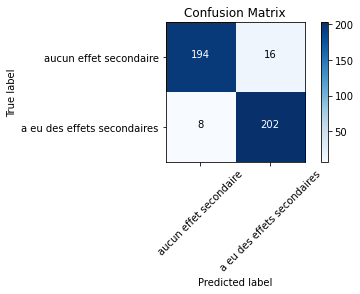

In [27]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


Lire une matrice de confusion

En regardant le tracé de la matrice de confusion, nous avons les étiquettes prédites sur l'axe des x et les vraies étiquettes sur l'axe des y. Les cellules bleues allant du coin supérieur gauche au coin inférieur droit contiennent le nombre d'échantillons que le modèle a prédit avec précision. La les cellules blanches contiennent le nombre d'échantillons qui ont été mal prédits.

Il y a 420nombre total d'échantillons dans l'ensemble de test. En regardant la matrice de confusion, nous pouvons voir que le modèle a prédit avec précision 391hors de 420échantillons totaux. Le modèle mal prédit 29hors de 420.

Pour les échantillons, le modèle est devenu correct, nous pouvons voir qu'il a prédit avec précision que les patients ne subiraient aucun effet secondaire 191fois. Il a prédit à tort que le patient aurait pas d'effets secondaires 10moments où le patient a effectivement ressenti des effets secondaires.

D'autre part, le modèle a prédit avec précision que le patient subirait des effets secondaires 200fois que le patient a effectivement ressenti des effets secondaires. Il a prédit à tort que le patient aurait des effets secondaires 19moments où le patient n'a pas ressenti d'effets secondaires.

Comme vous pouvez le voir, c'est un bon moyen d'interpréter visuellement la performance du modèle dans ses prédictions et de comprendre où il peut avoir besoin de travail.
